# Working with shapes and graphs

Throughout the sprint you will face algorithmic problems that will require you to perform graphic and geometric computations.

Within this notebook we will provide examples of use in two basic python libraries, `shapely` and `networkx`, that will allow you to perform such computations easily.
In addition, along this notebook we will also use the package `matplotlib` for drawing objects we create.

## Shapely

Shapely is a known python package dedicate for creating geometric object and performing computations on them.
The basic object in shapely is a point:

In [1]:
from shapely.geometry import Point

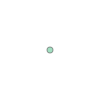

In [2]:
p = Point(0, 0)
p

Given two or more points, we can define the line between them using an object called `LineString`.
The constructor of `LineString` receives a list of `Point` objects:

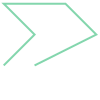

In [3]:
from shapely.geometry import LineString

l = LineString([Point(0, 0), Point(1, 1), Point(0, 2), Point(2, 2), Point(3, 1), Point(1, 0)])
l

There are several common operations that we can perform on every pair of geometric options:

In [4]:
# Containment check
l = LineString([(0, 0), (2, 0)])
p1, p2 = Point(1, 0), Point(3, 0)
l.contains(p1), l.contains(p2)

(True, False)

In [5]:
# Intersection check
l1 = LineString([(0, 0), (1, 1)])
l2 = LineString([(1, 0), (0, 1)])
l3 = LineString([(1, 0.5), (2, 0.5)])

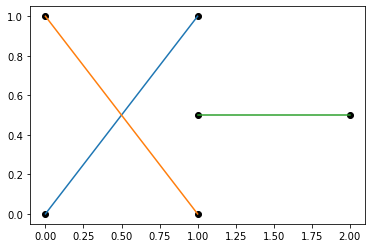

In [6]:
from algorithmics.utils.shapely_utils import plot

# You can draw objects using the `plot` method provided in the utils
plot([l1, l2, l3])

In [7]:
l1.intersects(l2), l1.intersects(l3)

(True, False)

In [8]:
# Intersection
# This method does not just verify if the intersection exists, but computes the object representing the intersection

print(l1.intersection(l2))  # In this case, we expect a point
print(l1.intersection(l3))  # In this case, we expect nothing
print(l1.intersection(l1))  # In this case, we expect a linestring

POINT (0.5 0.5)
LINESTRING EMPTY
LINESTRING (0 0, 1 1)


The next level will be creating a polygon.
Polygon is also defined by an ordered list of points:

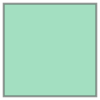

In [9]:
from shapely.geometry import Polygon

p = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p

The same type of operations as seen above can be performed on polygons as well:

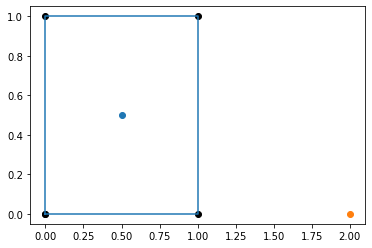

In [10]:
p1, p2 = Point(0.5, 0.5), Point(2, 0)
plot([p, p1, p2])

In [11]:
p.contains(p1), p.contains(p2)

(True, False)

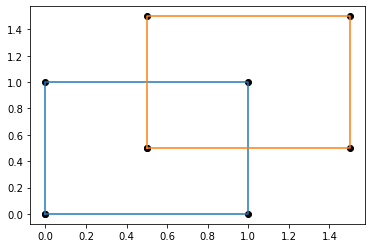

In [12]:
other_polygon = Polygon([(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)])
plot([p, other_polygon])

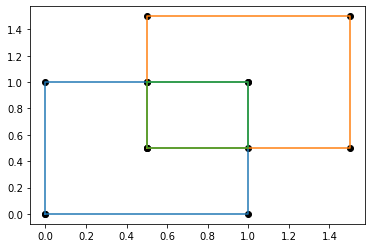

In [13]:
intersection = p.intersection(other_polygon)
plot([p, other_polygon, intersection])

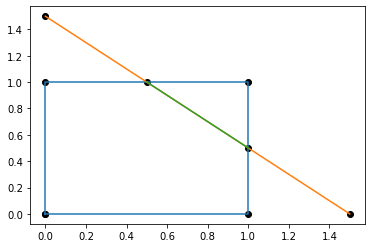

In [14]:
l = LineString([(0, 1.5), (1.5, 0)])
intersection = p.intersection(l)
plot([p, l, intersection])

The `shapely` package offers more types of geometric objects and operations.
You can read about them online in the [following link](https://shapely.readthedocs.io/en/stable/manual.html).

## Networkx

Networkx is a library dedicated for working with graphs.
Graph is an abstract object defined by a set of vertices/nodes, and edges connecting them.
We can define the graph be stating the sets of nodes and edges:

In [15]:
import networkx as nx

g = nx.Graph()

# We can add nodes and edges in groups
g.add_nodes_from([0, 1, 2])
g.add_edges_from([(0, 1), (1, 2)])

# Or one by one
g.add_node(3)
g.add_edge(2, 3)

In order to visualize the graph, we can use a pre-implemented function:

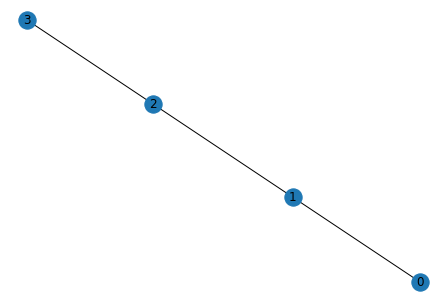

In [16]:
nx.draw(g, with_labels=True)

If we set the node names to be coordinates, we can manipulate the drawing to show every node in its desired location:

In [17]:
from itertools import combinations
import math
from algorithmics.utils.coordinate import Coordinate

g = nx.Graph()

# We add 9 nodes spread uniformly along the unit circle
angles = [math.radians(theta) for theta in range(0, 360, 40)]
g.add_nodes_from([Coordinate(math.cos(theta), math.sin(theta)) for theta in angles])

# We iterate every pair of coordinates using the `combinations` method, and add the edge to the graph:
for start, end in combinations(g.nodes, 2):
    g.add_edge(start, end)

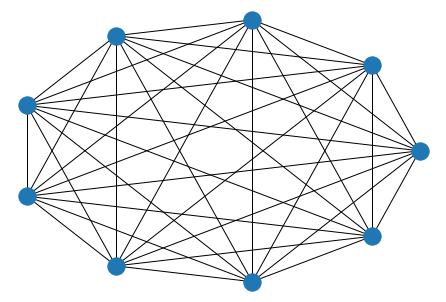

In [18]:
# We specify location using the `pos` argument
nx.draw(g, pos={node: (node.x, node.y) for node in g.nodes})

Another useful feature is assigning attributes to the edges (such as weights).
Those attributes are then can be used when applying graph algorithms that deal with such weights:

In [19]:
import random

# We build some imaginary graph
g = nx.Graph()

# We sample randomly 20 coordinates chosen uniformly in the unit square, and add the corners
g.add_nodes_from([Coordinate(random.random(), random.random()) for _ in range(4)])
g.add_nodes_from([Coordinate(0, 0), Coordinate(1, 1)])

# We connect every node to 2 randomly chosen neighbors. We set the distance as an edge attribute.
for node in g.nodes:
    for _ in range(3):
        neighbor = random.choice(list(g.nodes))

        # We skip if we chose to connect a node to itself
        if node == neighbor:
            continue

        # We compute the distance attribute
        dist = node.distance_to(neighbor)
        g.add_edge(node, neighbor, dist=dist)

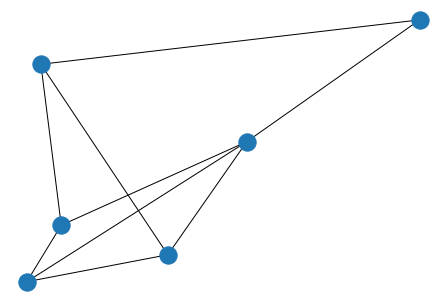

In [20]:
nx.draw(g, pos={node: (node.x, node.y) for node in g.nodes})

In [21]:
# We compute short path, using the `dist` attribute as weight
path = nx.shortest_path(g, source=Coordinate(0, 0), target=Coordinate(1, 1), weight='dist')
path

[Coordinate(x=0, y=0),
 Coordinate(x=0.5600614080693513, y=0.5348751899533444),
 Coordinate(x=1, y=1)]

Many more such algorithms are implemented within the `networkx` package for your use.
In addition, the package implements also special types of graphs - for example `nx.DiGraph` for directed graphs, and more.
You can read online about the package in the [following link](https://networkx.org/documentation/stable/tutorial.html).